### Step 1: Download Dataset

### Step 2: Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import pickle

### Step 3: Read the Dataset

In [2]:
#data collection
df = pd.read_csv(r"D:\ujjwal\projects\GDP-per-capita-prediction\dataset\DatasetGDP.csv")
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [3]:
df.tail()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489
226,Zimbabwe,SUB-SAHARAN AFRICA,12236805,390580,31.3,0.00,0.00,67.69,1900.0,90.7,26.8,8.32,0.34,91.34,2.0,28.01,21.84,0.179,0.243,0.579


In [4]:
# Understanding the data
df.shape

(227, 20)

In [5]:
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,227,227,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
unique,227,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,SUB-SAHARAN AFRICA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,NaN,NaN,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,NaN,NaN,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,NaN,NaN,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,NaN,NaN,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,NaN,NaN,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500


### Step 4: Univariate Analysis

### 📊 Univariate Analysis with Histograms and Box Plots

To explore the distribution of individual variables, we performed **univariate analysis** on key economic, demographic, social, geographic, and agricultural features such as `GDP ($ per capita)`, `Literacy (%)`, `Phones (per 1000)`, `Agriculture`, `Industry`, `Service`, `Birthrate`, `Deathrate`, and more.

We used:

* `histplot()` from **Seaborn** to visualize the **distribution** and **frequency** of values.
* `boxplot()` to detect **outliers** and observe **spread**, **median**, and potential **skewness**.

> This helps us understand data symmetry, presence of outliers, and choose the right measures of central tendency (mean or median).

Note: This step is part of **Exploratory Data Analysis (EDA)** and is important for identifying patterns and preparing the data for modeling.



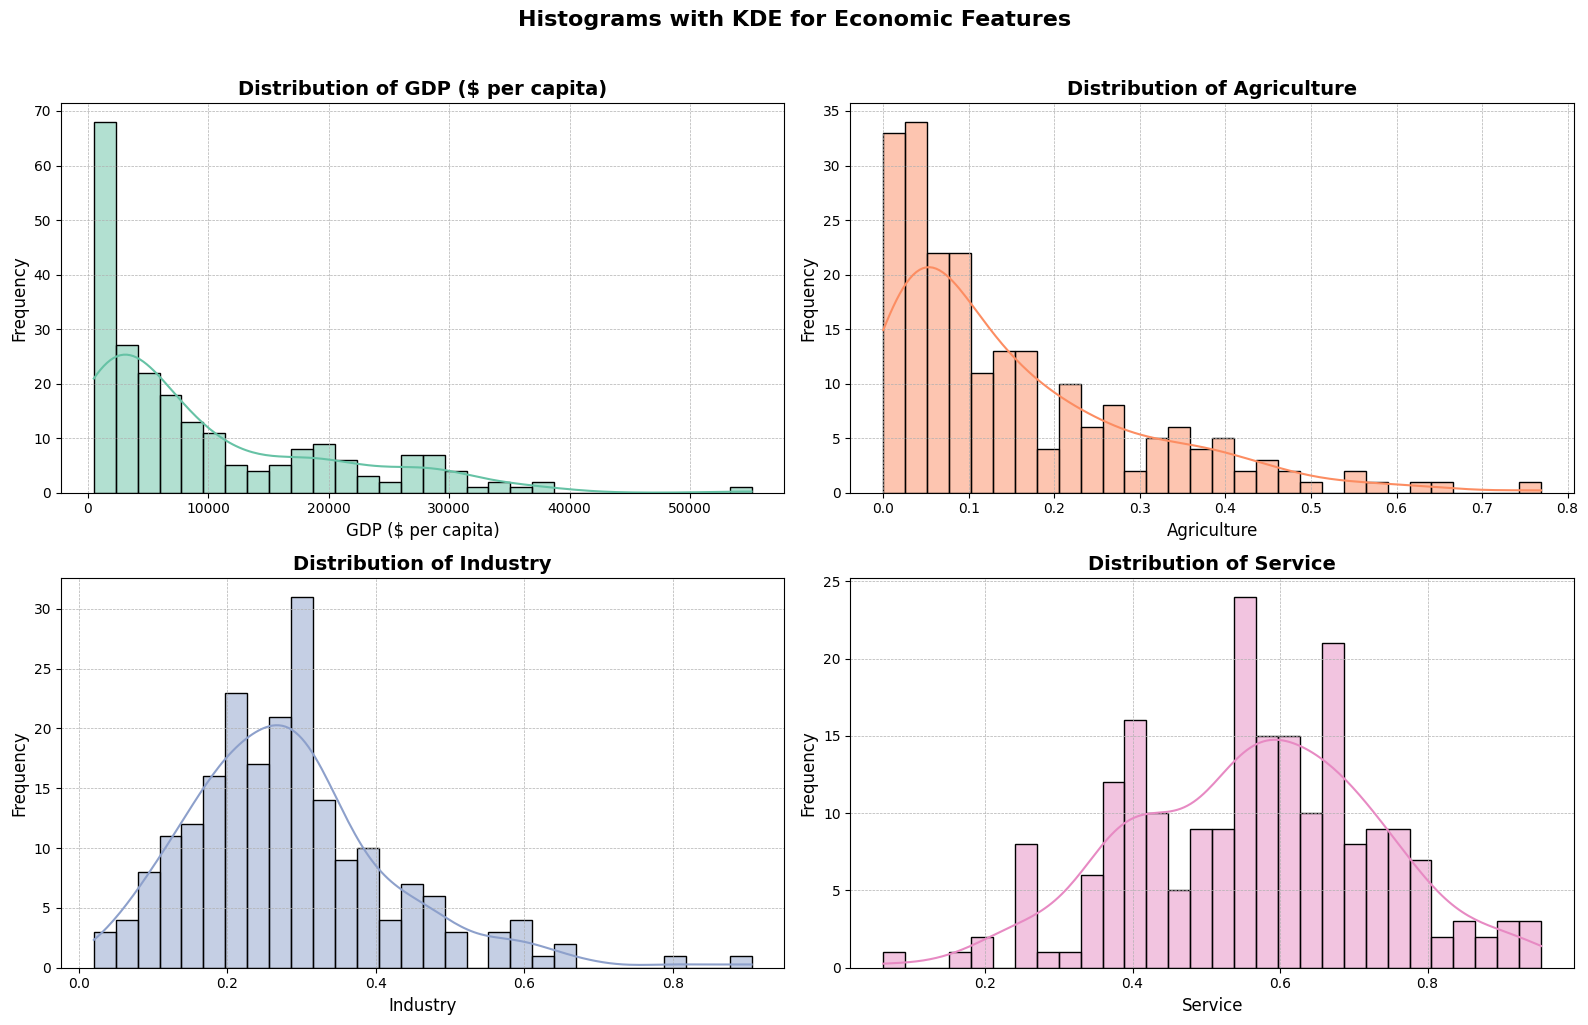

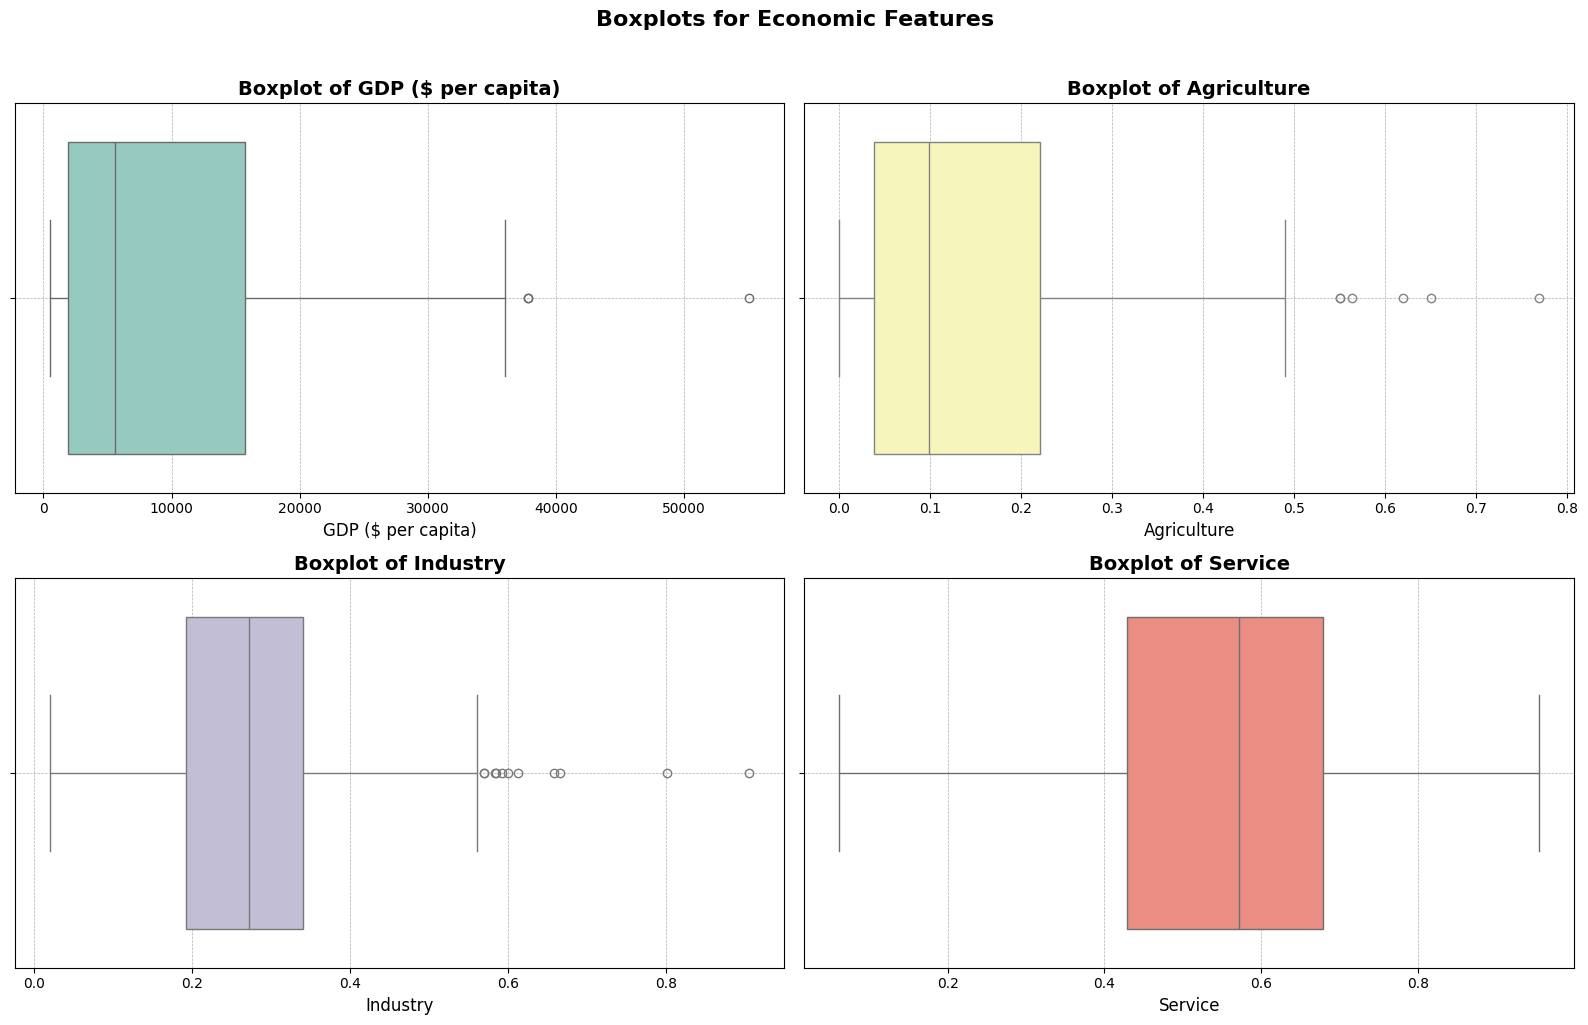

In [6]:
# Histogram + KDE
colors = sns.color_palette("Set2", 4)  

plt.figure(figsize=(16, 10))

for i, col in enumerate(['GDP ($ per capita)', 'Agriculture', 'Industry', 'Service']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col].dropna(), kde=True, color=colors[i], bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)

plt.suptitle("Histograms with KDE for Economic Features", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Boxplot
colors = sns.color_palette("Set3", 4)  

plt.figure(figsize=(16, 10))

for i, col in enumerate(['GDP ($ per capita)', 'Agriculture', 'Industry', 'Service']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col].dropna(), color=colors[i])
    plt.title(f'Boxplot of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)

plt.suptitle("Boxplots for Economic Features", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

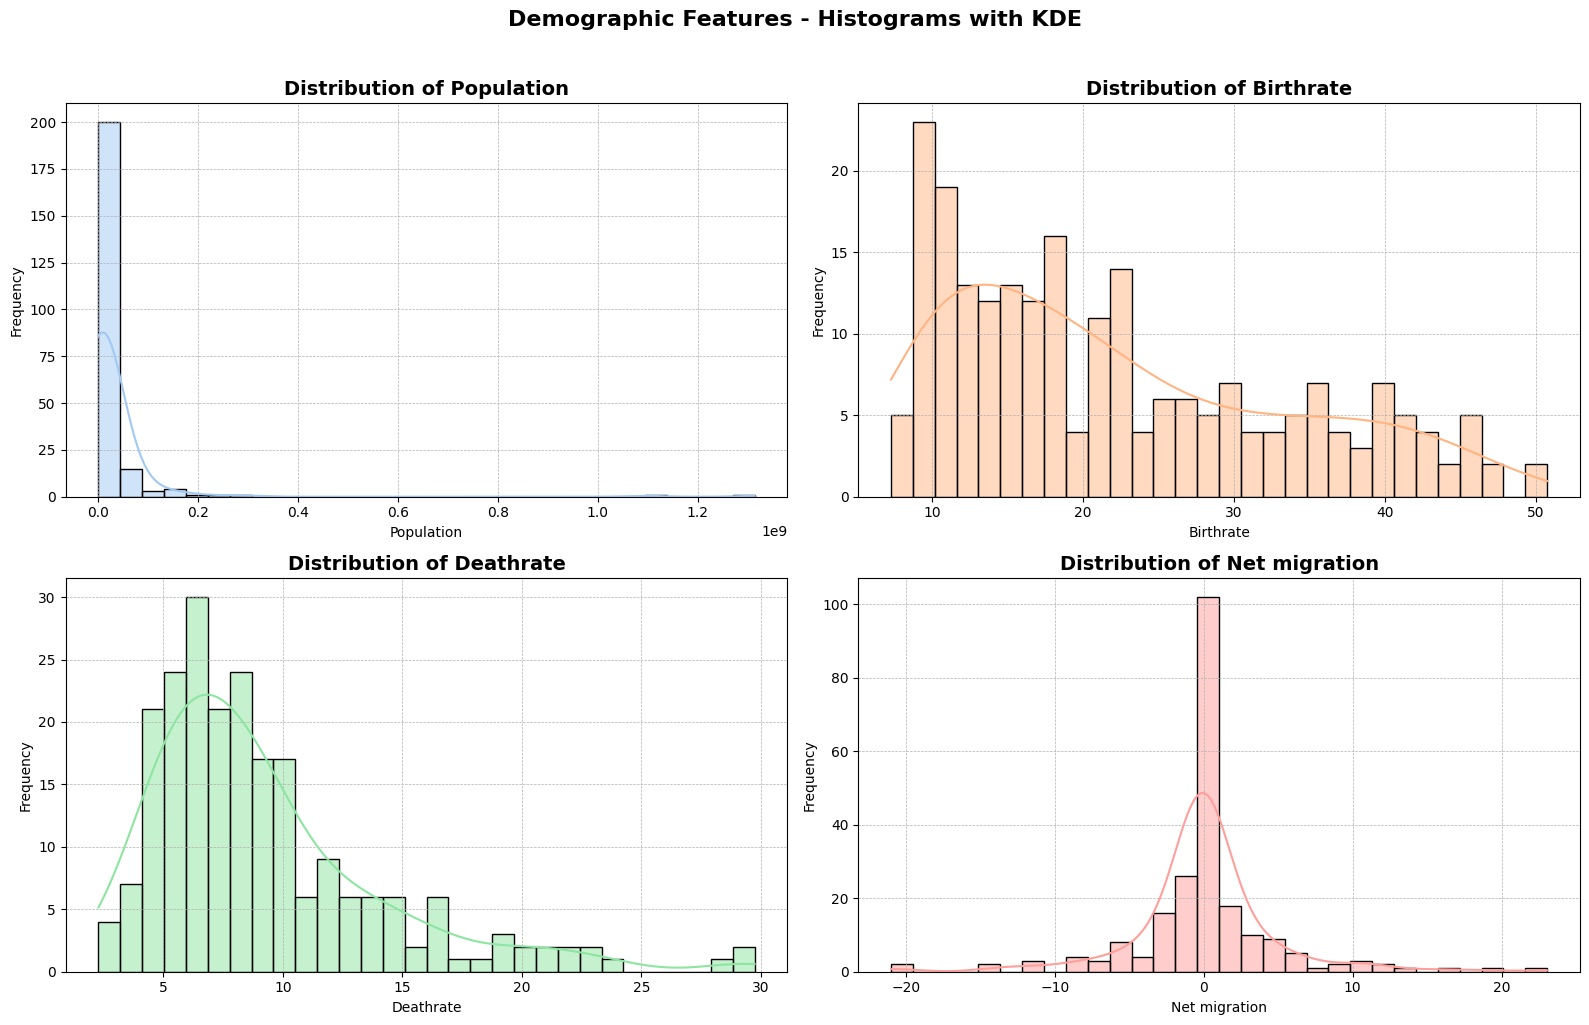

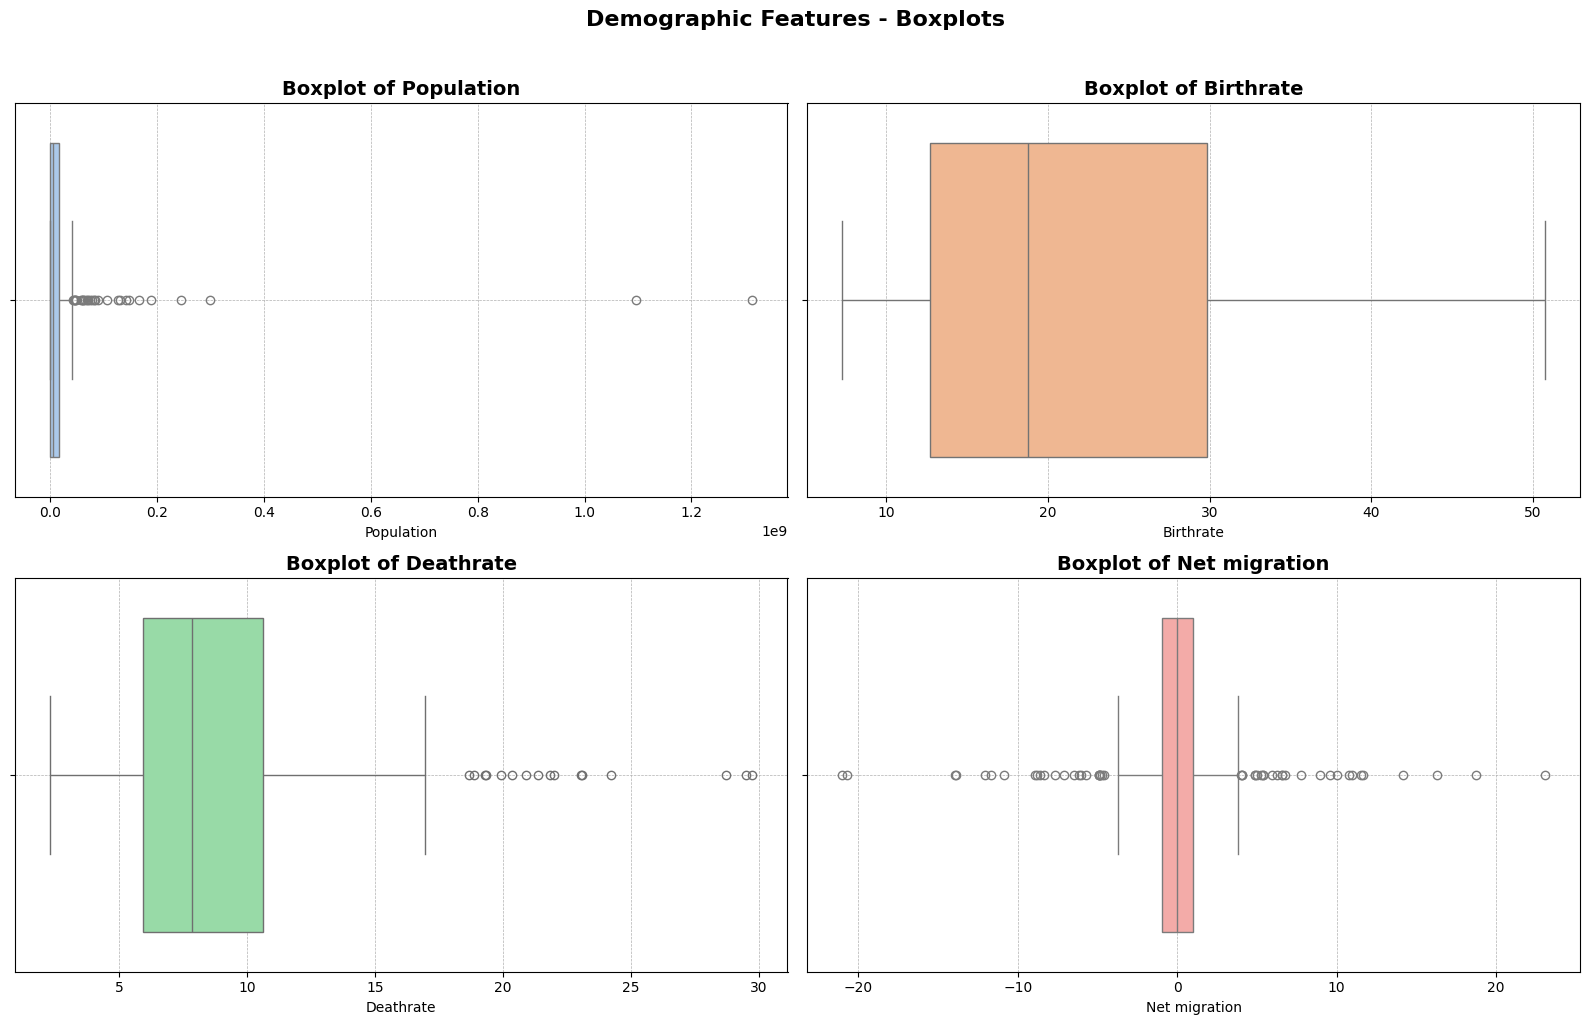

In [7]:
# Histogram + KDE
demo_cols = ['Population', 'Birthrate', 'Deathrate', 'Net migration']
colors = sns.color_palette("pastel", len(demo_cols))

plt.figure(figsize=(16, 10))
for i, col in enumerate(demo_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col].dropna(), kde=True, color=colors[i], bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', linewidth=0.5)
plt.suptitle("Demographic Features - Histograms with KDE", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(16, 10))
for i, col in enumerate(demo_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col].dropna(), color=colors[i])
    plt.title(f'Boxplot of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col)
    plt.grid(True, linestyle='--', linewidth=0.5)
plt.suptitle("Demographic Features - Boxplots", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


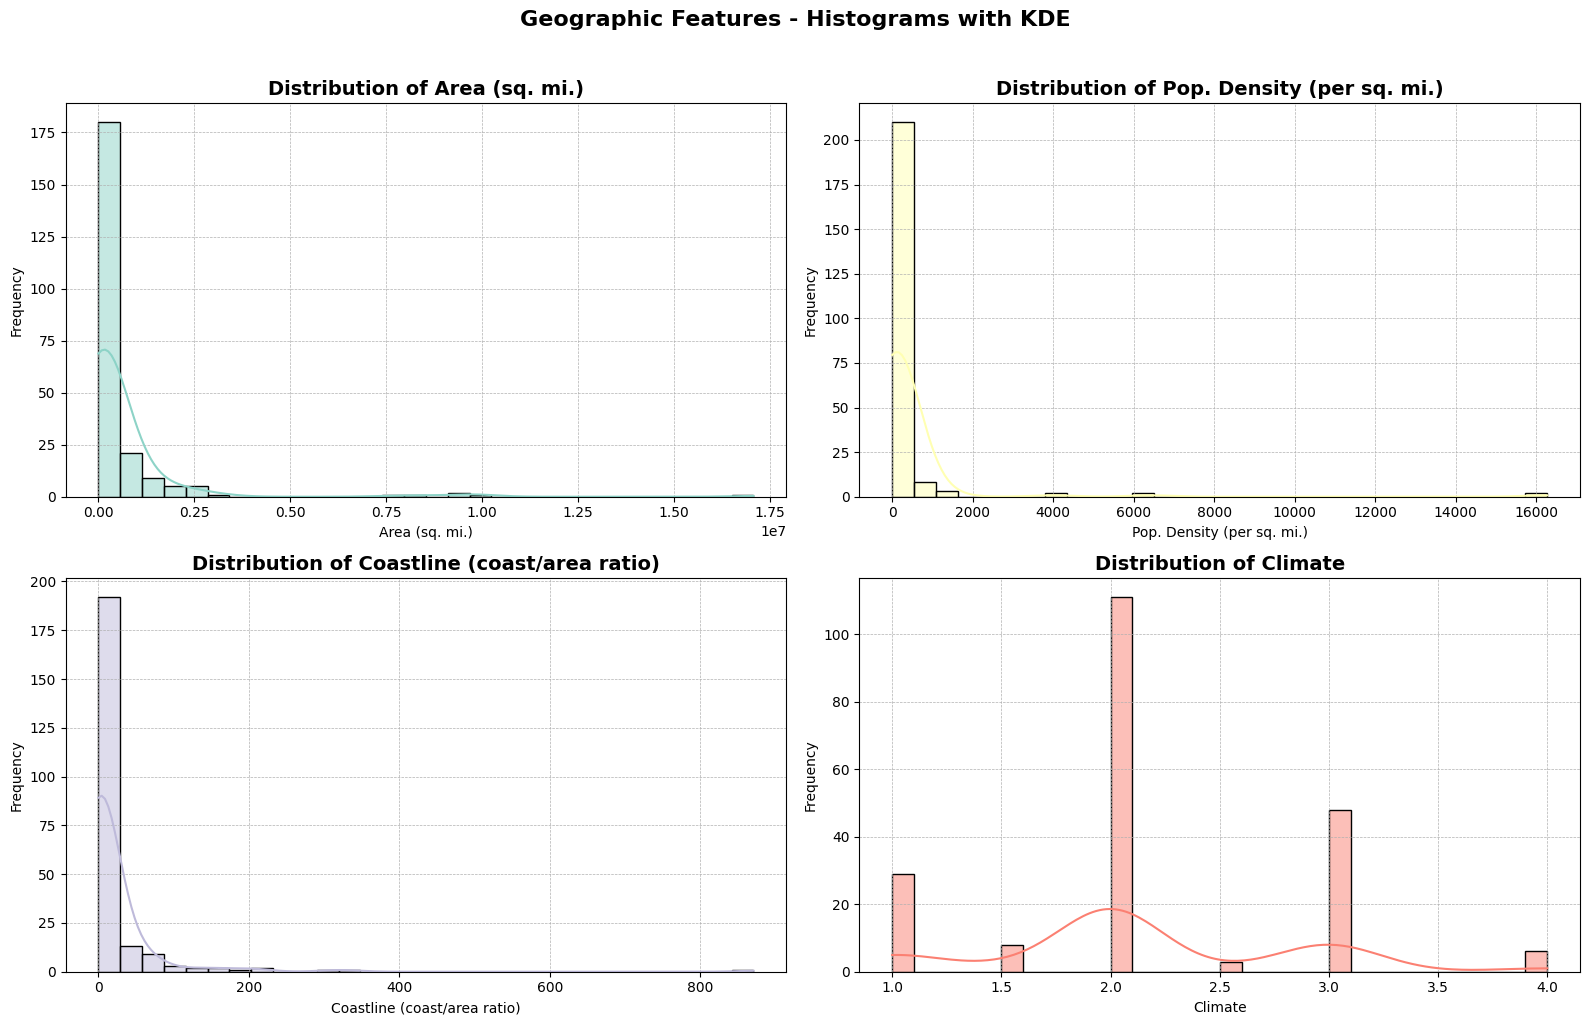

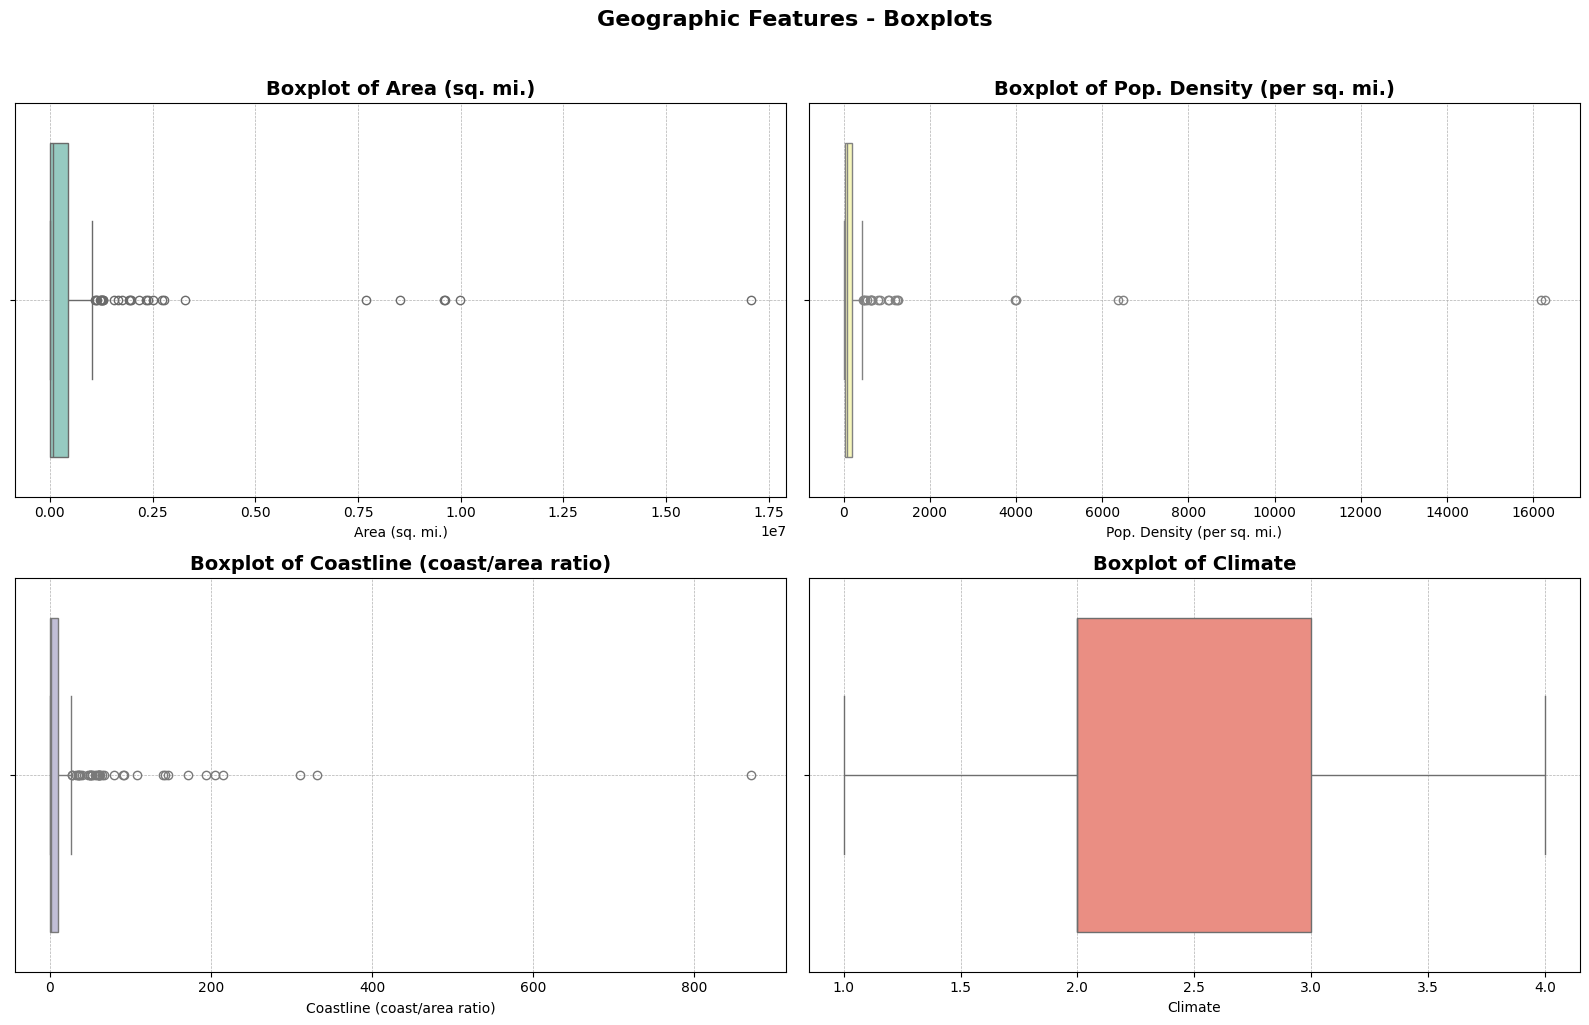

In [8]:
# Histogram + KDE
geo_cols = ['Area (sq. mi.)', 'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)', 'Climate']
colors = sns.color_palette("Set3", len(geo_cols))

plt.figure(figsize=(16, 10))
for i, col in enumerate(geo_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col].dropna(), kde=True, color=colors[i], bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', linewidth=0.5)
plt.suptitle("Geographic Features - Histograms with KDE", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(16, 10))
for i, col in enumerate(geo_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col].dropna(), color=colors[i])
    plt.title(f'Boxplot of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col)
    plt.grid(True, linestyle='--', linewidth=0.5)
plt.suptitle("Geographic Features - Boxplots", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


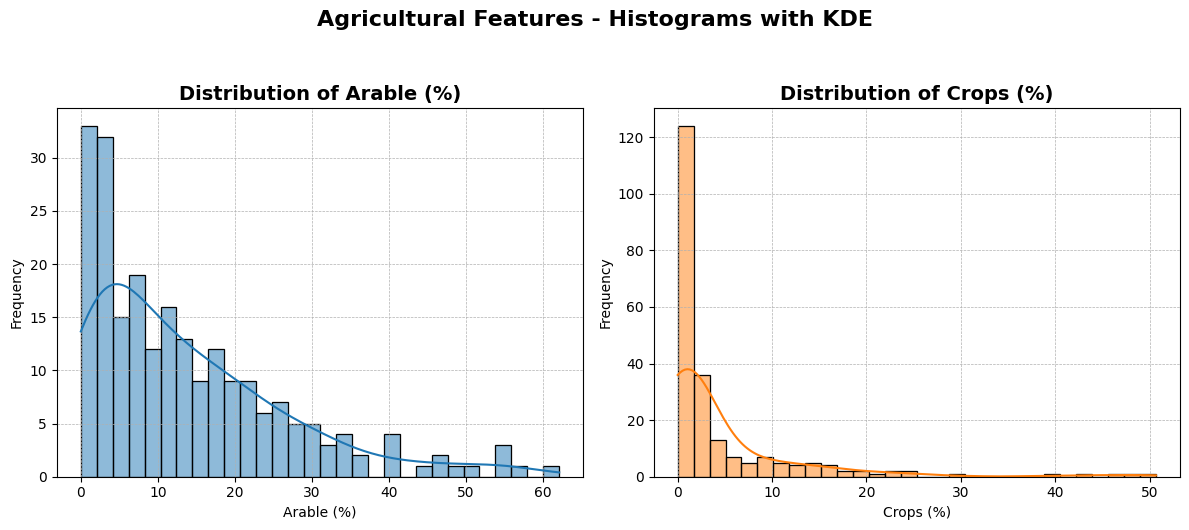

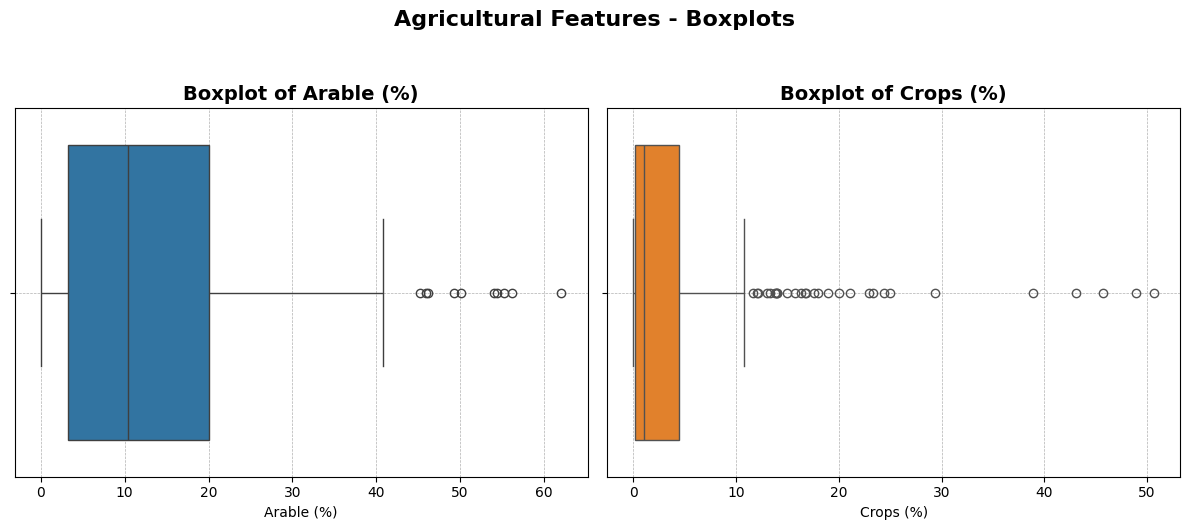

In [9]:
# Histogram + KDE
agri_cols = ['Arable (%)', 'Crops (%)']
colors = sns.color_palette("tab10", len(agri_cols))

plt.figure(figsize=(12, 5))
for i, col in enumerate(agri_cols):
    plt.subplot(1, len(agri_cols), i + 1)
    sns.histplot(df[col].dropna(), kde=True, color=colors[i], bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', linewidth=0.5)

plt.suptitle("Agricultural Features - Histograms with KDE", fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()


# Boxplot
plt.figure(figsize=(12, 5))
for i, col in enumerate(agri_cols):
    plt.subplot(1, len(agri_cols), i + 1)
    sns.boxplot(x=df[col].dropna(), color=colors[i])
    plt.title(f'Boxplot of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col)
    plt.grid(True, linestyle='--', linewidth=0.5)

plt.suptitle("Agricultural Features - Boxplots", fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()



<Axes: >

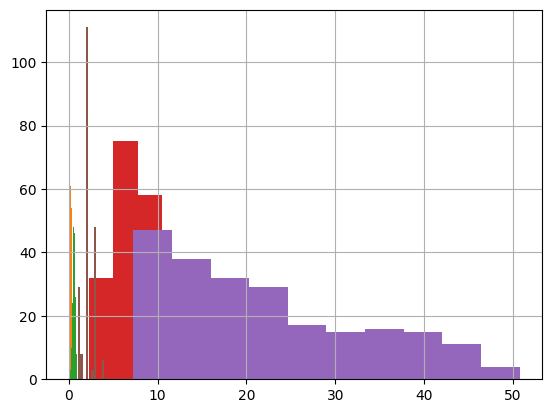

In [10]:
# checking skewness for median or mean
df["Agriculture"].hist()
df["Industry"].hist()
df["Service"].hist()
df["Deathrate"].hist()
df["Birthrate"].hist()
df["Climate"].hist()

### Step 5: Bivariate Analysis

### 🔍 Bivariate Analysis with Count Plots

To analyze the relationship between various features and regions, we converted continuous variables into categorical bins (e.g., Low, Medium, High). 

We then used `countplot()` from Seaborn with the `hue` set to **Region** to observe how the distributions vary across regions.

> This helps in identifying dominant regions in terms of Literacy, GDP, Phones, etc.

Note: This categorization is only for Exploratory Data Analysis (EDA), not used for model training.


In [11]:
# Categorizing continuous features for visualization purposes

df['Literacy_cat'] = ['High' if x >= 90 else 'Medium' if x >= 70 else 'Low' for x in df['Literacy (%)']]
df['Phones_cat'] = ['High' if x >= 600 else 'Medium' if x >= 300 else 'Low' for x in df['Phones (per 1000)']]
df['Arable_cat'] = ['High' if x >= 50 else 'Medium' if x >= 20 else 'Low' for x in df['Arable (%)']]
df['Crops_cat'] = ['High' if x >= 30 else 'Medium' if x >= 10 else 'Low' for x in df['Crops (%)']]
df['GDP_cat'] = ['High' if x >= 50000 else 'Medium' if x >= 20000 else 'Low' for x in df['GDP ($ per capita)']]
df['Pop_cat'] = ['Large' if x >= 500_000_000 else 'Medium' if x >= 50_000_000 else 'Small' for x in df['Population']]


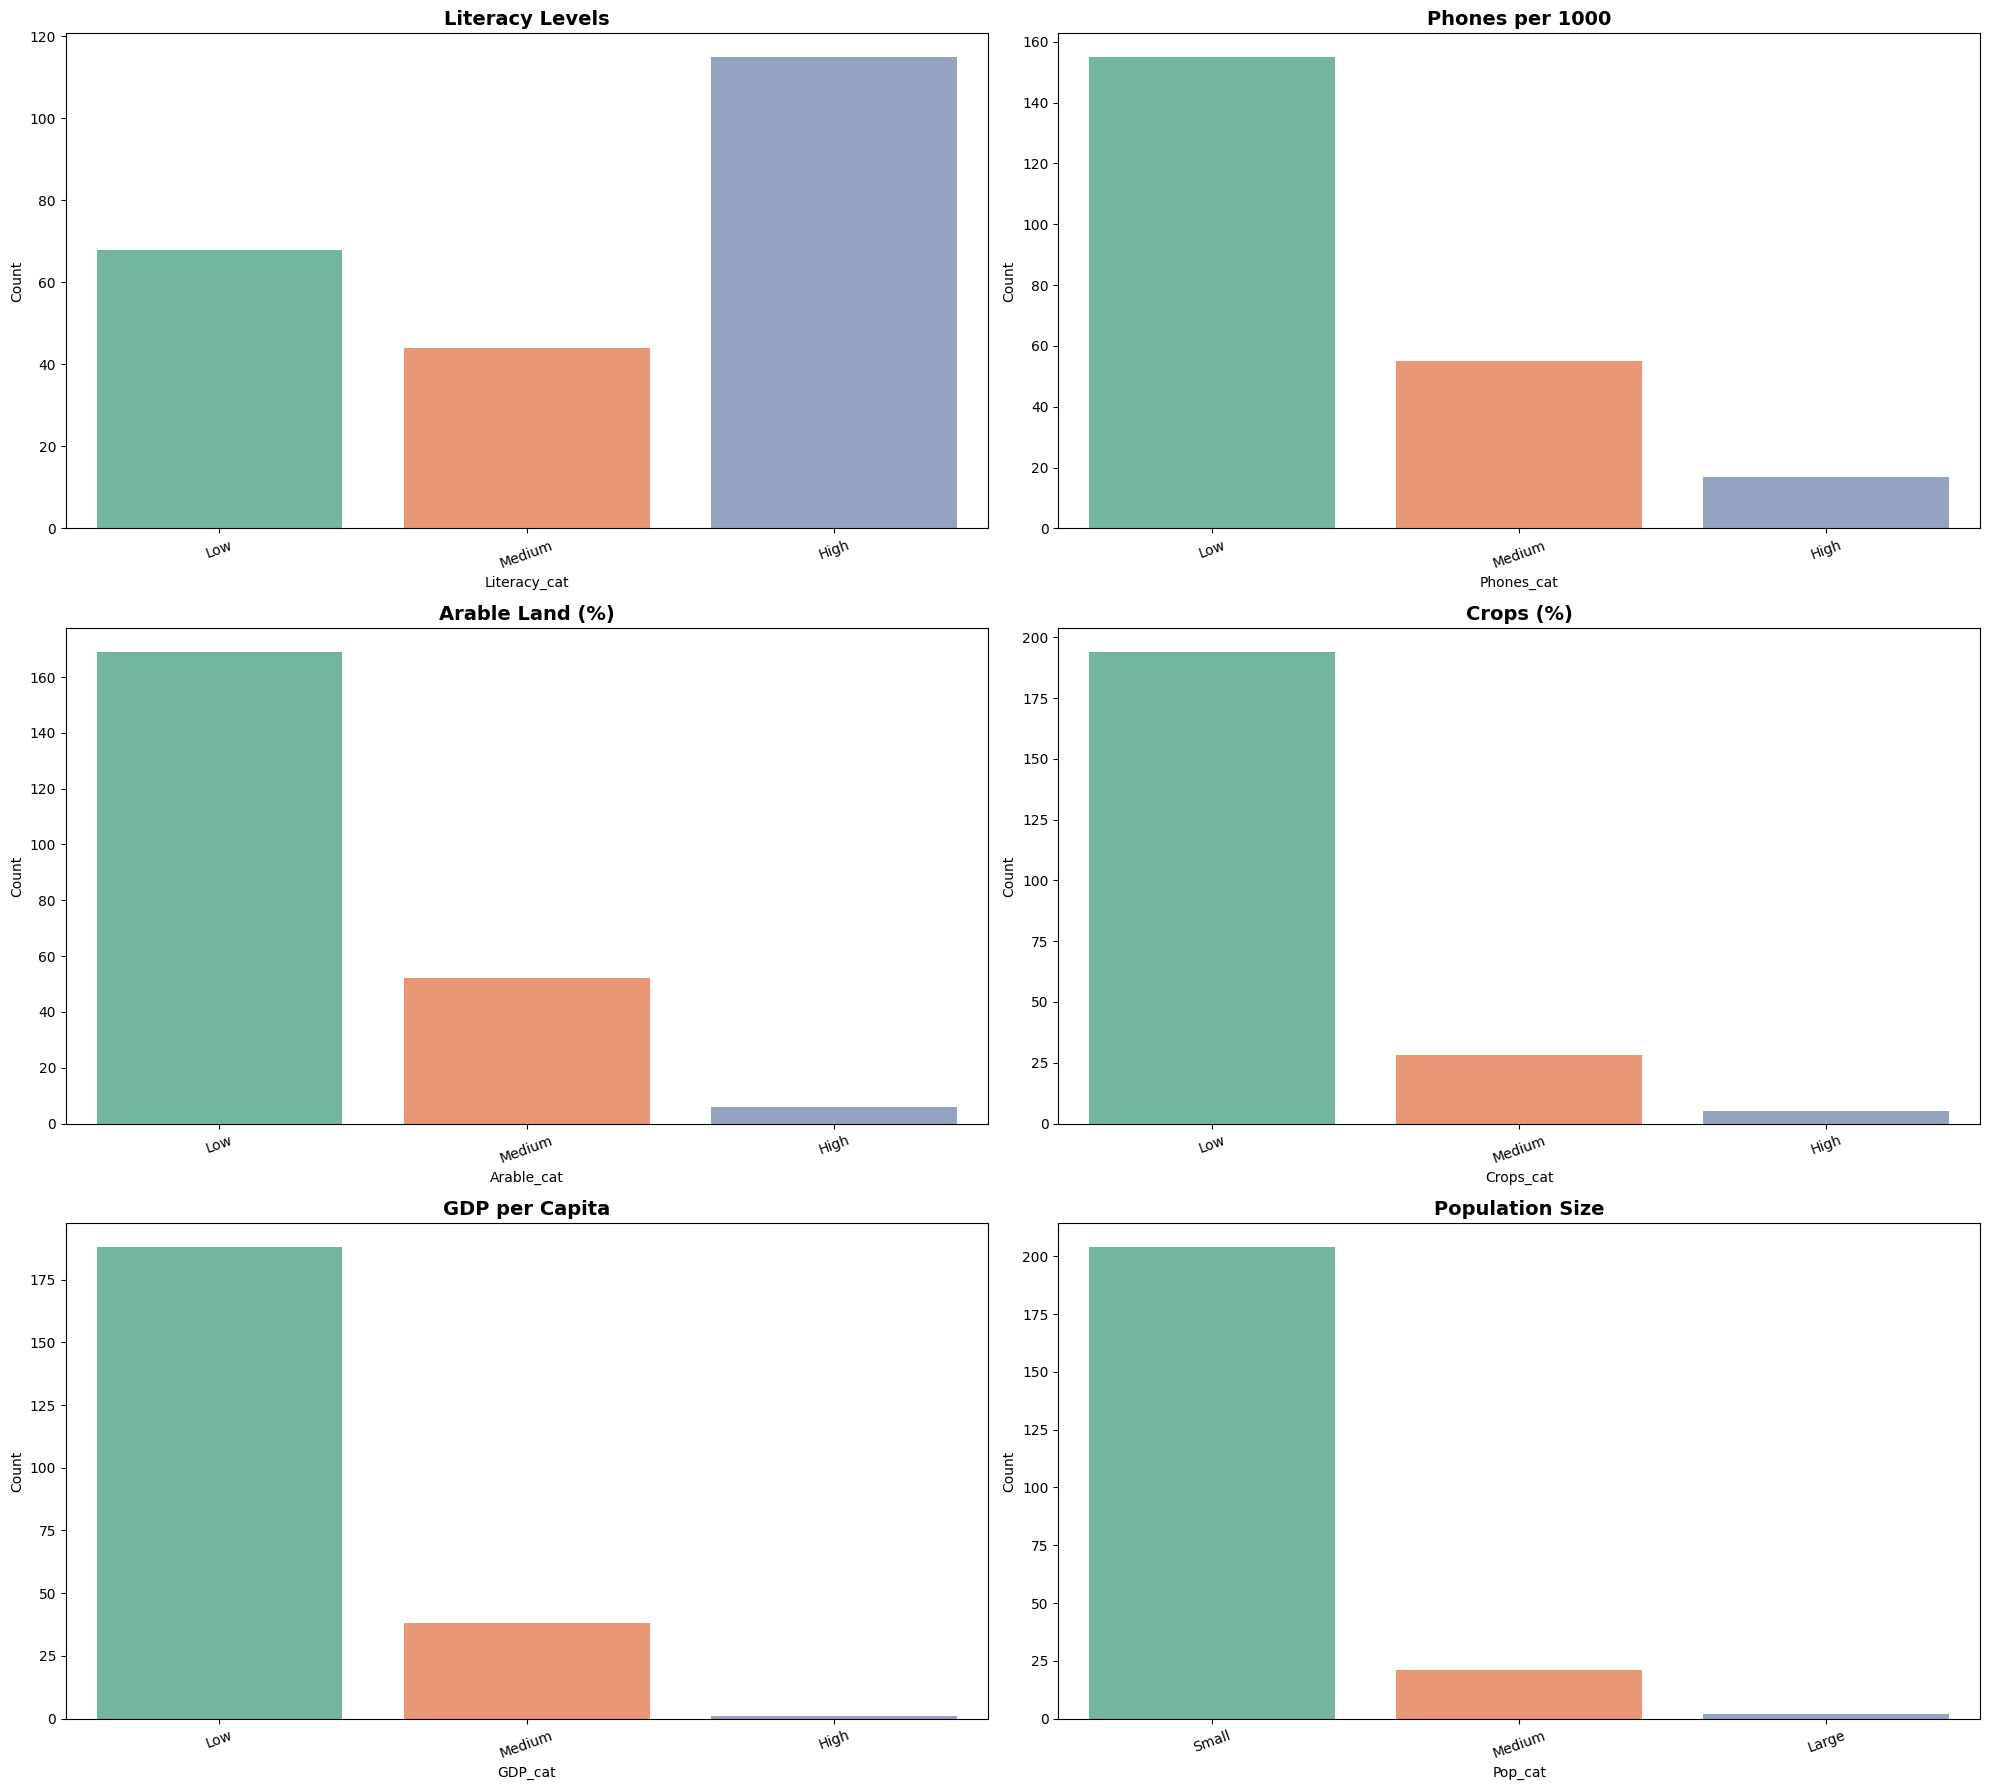

In [12]:
plt.figure(figsize=(20, 18))
features = ['Literacy_cat', 'Phones_cat', 'Arable_cat', 'Crops_cat', 'GDP_cat', 'Pop_cat']
titles = ['Literacy Levels', 'Phones per 1000', 'Arable Land (%)', 'Crops (%)', 'GDP per Capita', 'Population Size']

for i, col in enumerate(features):
    plt.subplot(3, 2, i + 1)
    sns.countplot(x=col, hue=col, data=df, palette='Set2', legend=False) 
    plt.title(f'{titles[i]}', fontsize=14, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=20)

plt.tight_layout()
plt.show()

### 🔗 Pairplot for Bivariate Relationships

To examine pairwise relationships between numerical features, we used `pairplot()` from **Seaborn**. This allows us to visually inspect how different features relate to each other and whether any patterns or correlations exist.

The pairplot plots scatterplots for every pair of selected features and histograms along the diagonals for individual feature distributions.

> This helps in identifying correlated features and trends across different variables, which is useful before building regression or classification models.

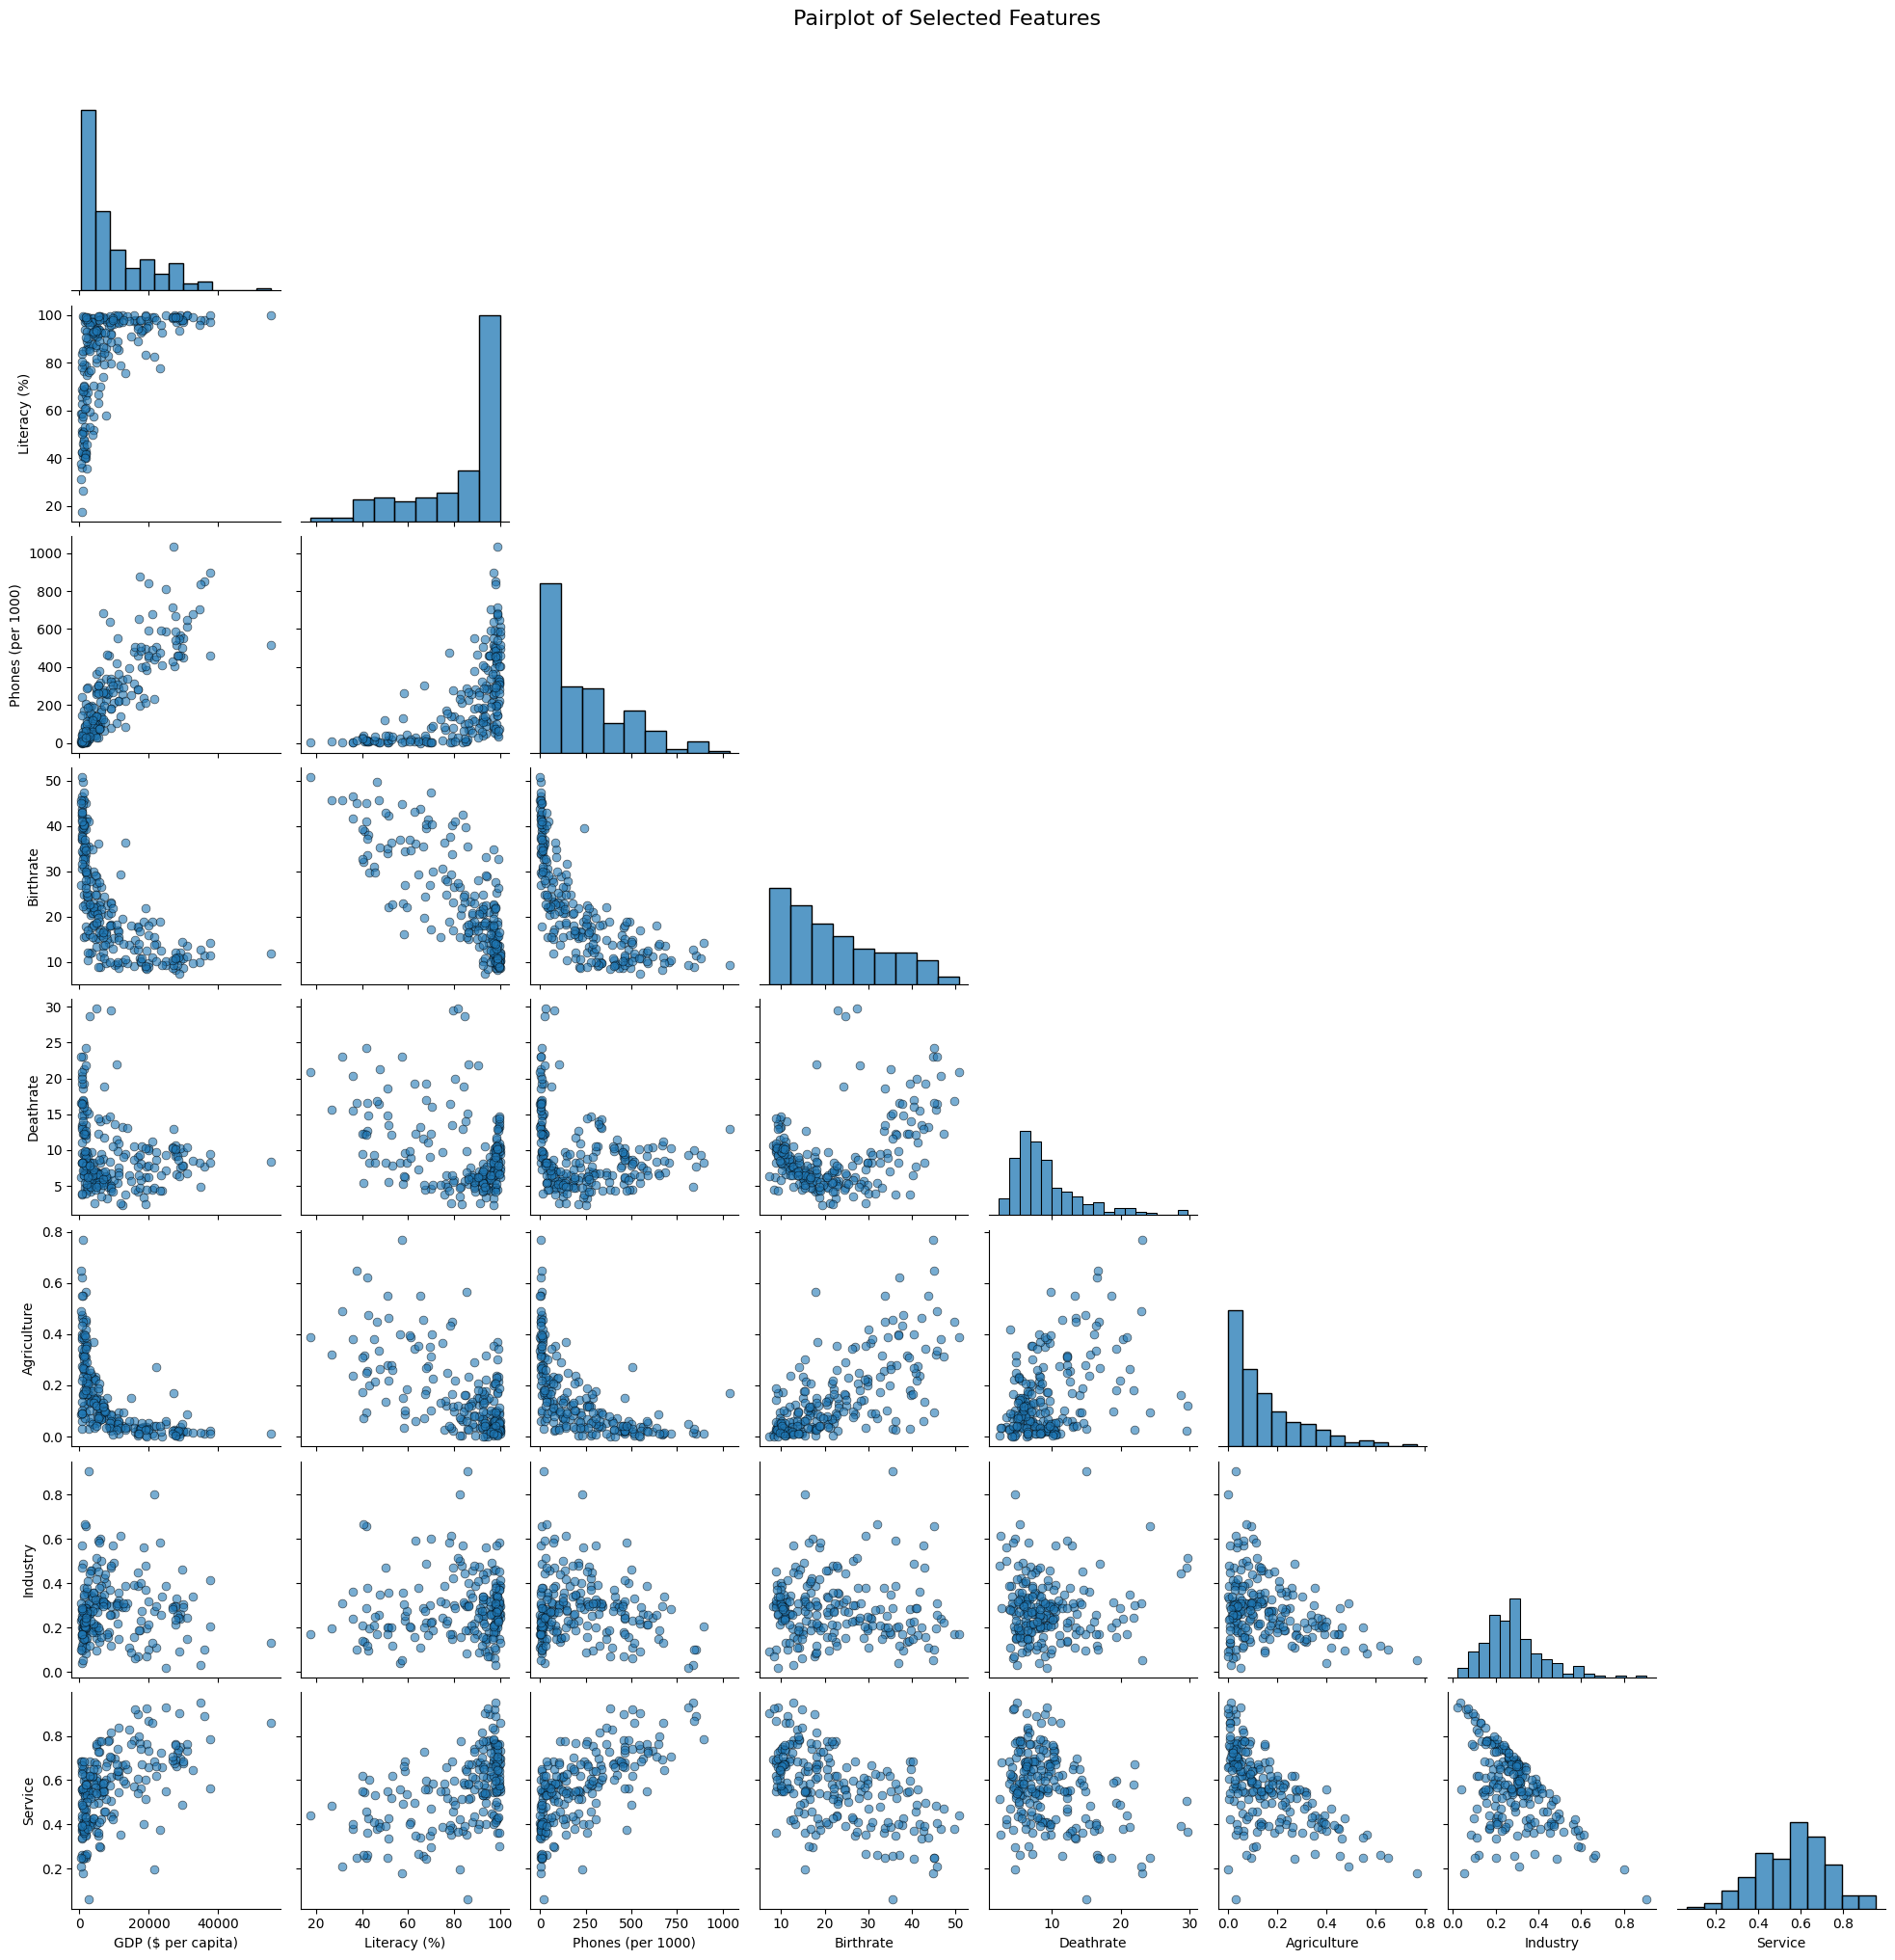

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for pairplot
selected_features = ['GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 
                     'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service']

# Plot the pairplot
sns.pairplot(df[selected_features], corner=True, plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'k'})
plt.suptitle('Pairplot of Selected Features', fontsize=16, y=1.02)
plt.show()


### Step 6: Multivariate Analysis
#### 🔥 Heatmaps for Multivariate Analysis
A heatmap is a graphical representation of data where values are depicted by color. It’s especially useful for multivariate analysis to visualize correlations between multiple variables.
It easily identify relationships between numerical features,
spot strong positive or negative correlations and
helps decide feature selection for machine learning.

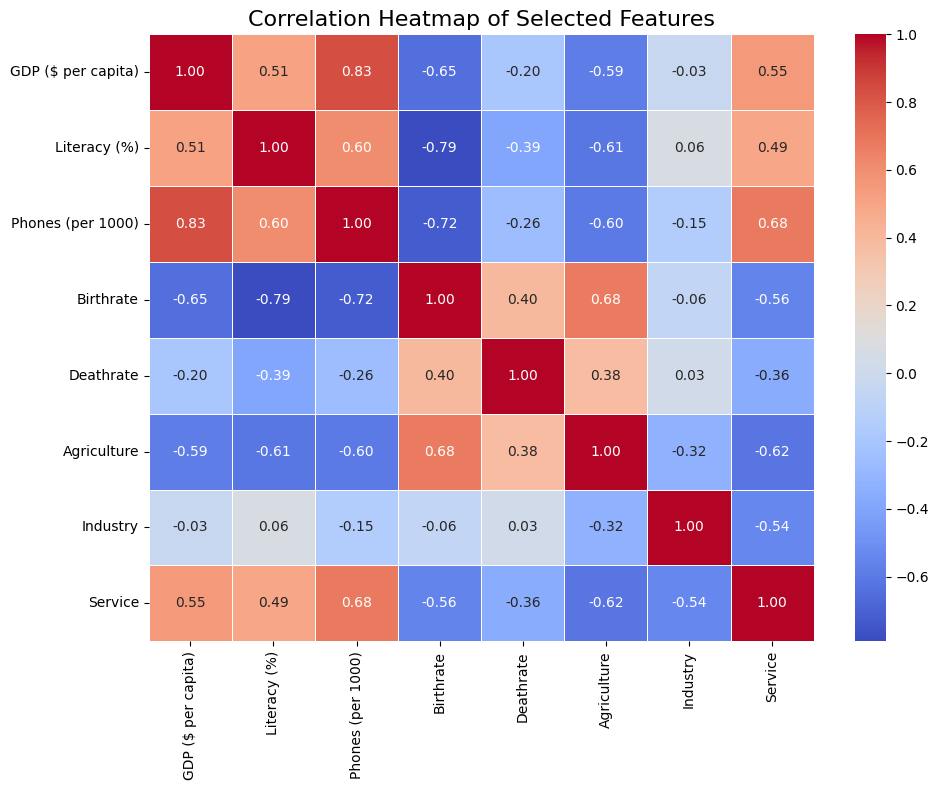

In [14]:
selected_features = ['GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 
                     'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service']

correlation_matrix = df[selected_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features", fontsize=16)
plt.tight_layout()
plt.show()

### Step 7: Descriptive Analysis
#### 🧾 Descriptive Analysis in Pandas
Descriptive analysis is the process of summarizing and understanding the basic features of a dataset. It provides simple summaries and helps identify data types, missing values, central tendencies, and spread.

In [15]:
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Deathrate,Agriculture,Industry,Service,Literacy_cat,Phones_cat,Arable_cat,Crops_cat,GDP_cat,Pop_cat
count,227,227,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,...,223.000000,212.000000,211.000000,212.000000,227,227,227,227,227,227
unique,227,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3,3,3,3,3,3
top,Afghanistan,SUB-SAHARAN AFRICA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,High,Low,Low,Low,Low,Small
freq,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,115,155,169,194,188,204
mean,NaN,NaN,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,...,9.241345,0.150844,0.282711,0.565283,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,...,4.990026,0.146798,0.138272,0.165841,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,...,2.290000,0.000000,0.020000,0.062000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,...,5.910000,0.037750,0.193000,0.429250,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,...,7.840000,0.099000,0.272000,0.571000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,...,10.605000,0.221000,0.341000,0.678500,NaN,NaN,NaN,NaN,NaN,NaN


### Step 8: Drop unwanted features

To make the dataset model-ready, the following columns were dropped:

- **`Country`**: Acts as an identifier with unique values, not helpful for predictions.
- **`Other (%)`** and **`Infant mortality (per 1000 births)`**: Found to be highly correlated and hence redundant.
- **Binned/categorical columns** like `Literacy_cat`, `Phones_cat`, `Arable_cat`, etc., were created just for visual understanding and are no longer needed.

> ✅ We have **retained the `Region`** column for potential use in geographic analysis.


In [16]:
# Dropping unnecessary columns for model building
df.drop([
    "Country",                     # Unique identifier
    "Other (%)",                   # Highly correlated
    "Infant mortality (per 1000 births)",  # Highly correlated
    "Literacy_cat", "Phones_cat", # Used only for visualization
    "Arable_cat", "Crops_cat",
    "GDP_cat", "Pop_cat"
], axis=1, inplace=True)


### Step 9: Checking for null values

In [17]:
# Handling missing values
df.isnull().sum()

Region                           0
Population                       0
Area (sq. mi.)                   0
Pop. Density (per sq. mi.)       0
Coastline (coast/area ratio)     0
Net migration                    3
GDP ($ per capita)               1
Literacy (%)                    18
Phones (per 1000)                4
Arable (%)                       2
Crops (%)                        2
Climate                         22
Birthrate                        3
Deathrate                        4
Agriculture                     15
Industry                        16
Service                         15
dtype: int64


### 🧹 Handling Missing Value
During preprocessing, we observed that a **few specific columns contained missing values**. To ensure the dataset remains clean and compatible with machine learning models, we chose to **drop rows containing `NaN` values** from these essential features:

* **`Net migration`**
* **`GDP ($ per capita)`**
* **`Phones (per 1000)`**
* **`Arable (%)`**
* **`Crops (%)`**
* **`Birthrate`**
* **`Deathrate`**

Since the number of missing entries was relatively small, this approach helped maintain data quality without significantly reducing dataset size.


In [18]:
# Dropping uneccessary values
df = df.dropna(subset=['Net migration'])
df = df.dropna(subset=['GDP ($ per capita)'])
df = df.dropna(subset=['Phones (per 1000)'])
df = df.dropna(subset=['Arable (%)'])
df = df.dropna(subset=['Crops (%)'])
df = df.dropna(subset=['Birthrate'])
df = df.dropna(subset=['Deathrate'])

### 🧹 Handling Missing Values Based on Outlier Count

To clean the dataset while minimizing distortion from outliers, we applied **different imputation strategies** based on the number of outliers in each feature:

### 📊 Strategy Used:

* **Mean Imputation** (outlier count < 10):
  Used for features with **few or no outliers** to preserve central tendency.

  * `Literacy (%)` — 3 outliers
  * `Climate` — 0 outliers
  * `Service` — 0 outliers
  * `Agriculture` — 6 outliers

* **Median Imputation** (outlier count ≥ 10):
  Used for features with **higher number of outliers** to reduce skew impact.

  * `Industry` — 11 outliers

This ensures accurate handling of missing data while minimizing the effect of outliers on the dataset.


In [19]:
df['Literacy (%)'] = df['Literacy (%)'].fillna(df['Literacy (%)'].mean())
df['Climate'] = df['Climate'].fillna(df['Climate'].mean())
df['Service'] = df['Service'].fillna(df['Service'].mean())
df['Agriculture'] = df['Agriculture'].fillna(df['Agriculture'].mean())
df['Industry'] = df['Industry'].fillna(df['Industry'].median())

In [20]:
df.isnull().sum()

Region                          0
Population                      0
Area (sq. mi.)                  0
Pop. Density (per sq. mi.)      0
Coastline (coast/area ratio)    0
Net migration                   0
GDP ($ per capita)              0
Literacy (%)                    0
Phones (per 1000)               0
Arable (%)                      0
Crops (%)                       0
Climate                         0
Birthrate                       0
Deathrate                       0
Agriculture                     0
Industry                        0
Service                         0
dtype: int64

In [21]:
# Check for Duplicates
df.duplicated().sum()


np.int64(0)

### Step 10: Handling outliers

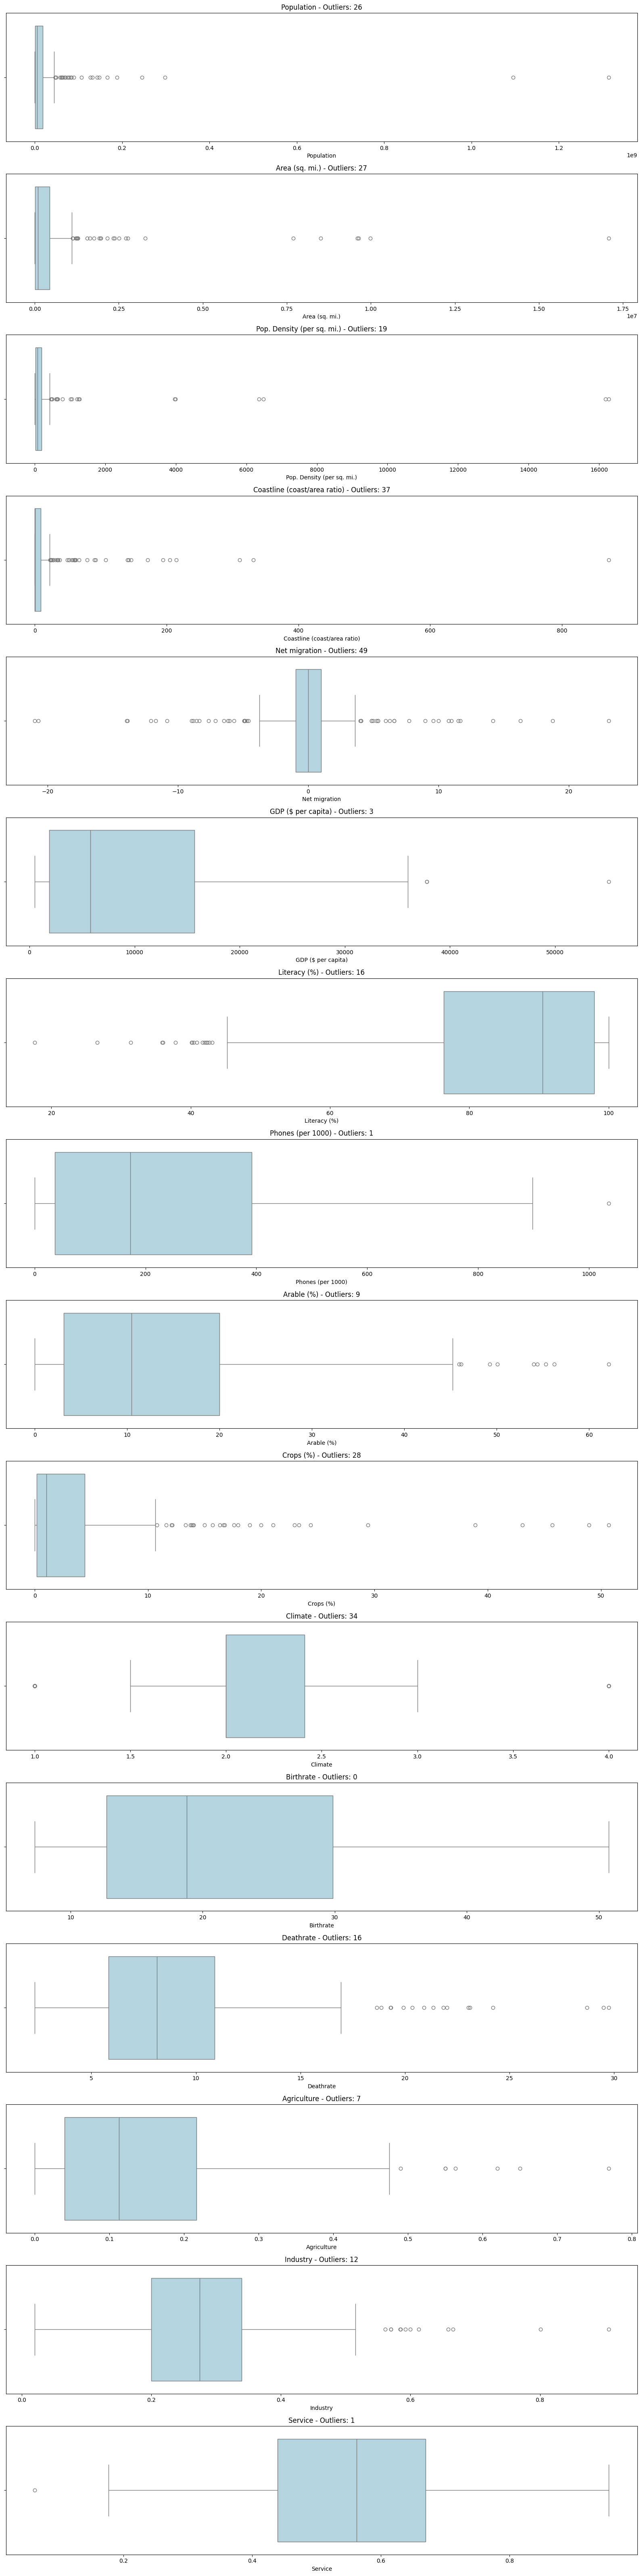

,Feature,Outlier Count
4,Net migration,49
3,Coastline (coast/area ratio),37
10,Climate,34
9,Crops (%),28
1,Area (sq. mi.),27
0,Population,26
2,Pop. Density (per sq. mi.),19
6,Literacy (%),16
12,Deathrate,16
14,Industry,12


In [22]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Dictionary to store outlier count per column
outlier_summary = {}

# Set up plots
plt.figure(figsize=(16, len(numeric_cols) * 4))

for i, col in enumerate(numeric_cols):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count of outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = outliers.shape[0]
    outlier_summary[col] = outlier_count

    # Plot
    plt.subplot(len(numeric_cols), 1, i + 1)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'{col} - Outliers: {outlier_count}', fontsize=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# Display the outlier summary
outlier_df = pd.DataFrame(list(outlier_summary.items()), columns=['Feature', 'Outlier Count'])
outlier_df = outlier_df.sort_values(by='Outlier Count', ascending=False)
display(outlier_df)

Outliers were identified in many numerical features. To handle them without dropping valuable data, we applied two transformation techniques:

- **Logarithmic Transformation** (for reducing right skew)
- **Square Root Transformation** (for moderately skewed data)

For each feature:
- We calculated the skewness before and after applying both transformations.
- The transformation that minimized the skewness (closer to 0) was retained.

> Features with negative or zero values were **excluded from log transformation** to avoid undefined results.

This step helps normalize the distribution, stabilize variance, and reduce the impact of outliers on model training.

In [23]:
import numpy as np
import pandas as pd

# Assuming df is your original cleaned DataFrame (without Country/Region, and nulls removed)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# To store the best transformation
best_transforms = {}

# DataFrames to store transformed versions
log_df = df.copy()
sqrt_df = df.copy()
final_df = df.copy()

for col in numerical_cols:
    # Avoid transformation for values <= 0 (to prevent log(0) issues)
    if (df[col] <= 0).any():
        continue
    
    # Apply transformations
    log_transformed = np.log(df[col])
    sqrt_transformed = np.sqrt(df[col])
    
    # Calculate skewness
    orig_skew = df[col].skew()
    log_skew = log_transformed.skew()
    sqrt_skew = sqrt_transformed.skew()
    
    # Select the transformation that brings skewness closer to 0
    if abs(log_skew) < abs(sqrt_skew) and abs(log_skew) < abs(orig_skew):
        final_df[col] = log_transformed
        best_transforms[col] = "log"
    elif abs(sqrt_skew) < abs(orig_skew):
        final_df[col] = sqrt_transformed
        best_transforms[col] = "sqrt"
    else:
        best_transforms[col] = "none"

# Print best transformation method for each feature
for feature, method in best_transforms.items():
    print(f"{feature}: {method} transformation applied")


Population: log transformation applied
Area (sq. mi.): log transformation applied
GDP ($ per capita): log transformation applied
Literacy (%): none transformation applied
Phones (per 1000): sqrt transformation applied
Climate: sqrt transformation applied
Birthrate: log transformation applied
Deathrate: log transformation applied
Industry: sqrt transformation applied
Service: none transformation applied


### Step 11: Handling categorical data

In [24]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['Region']

To convert the categorical Region column into a numerical format, Label Encoding was applied using LabelEncoder from sklearn.preprocessing.

This transformation is essential for machine learning models, which typically do not accept string-based features.

In [25]:
# Initialize encoder
le = LabelEncoder()

# Encode 'Region' in-place
df['Region'] = le.fit_transform(df['Region'])


### Step 12: Splitting data into train and test

Here X and y variables are created. On X variable, df is passed with dropping the target variable. And on y target variable is passed. For splitting training and testing data we are using train_test_split() function from sklearn. As parameters, we are passing X, y, test_size, random_state.

In [26]:
# Train test split
X = df.drop('GDP ($ per capita)', axis=1) 
y = df['GDP ($ per capita)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 13: Feature Scaling

Feature scaling is a method used to normalize the range of independent variables or features of data. Standard scaler() is initialized. Independent training data is passed in the fit_transform() method and independent test data is passed in the transform() function.

In [27]:
scaler = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Only transform test data
X_test_scaled = scaler.transform(X_test)

### Step 14:  Linear Regression

A function named linear_reg is created and train and test data are passed as the parameters. Inside the function, Linear Regression() algorithm is initialized and training data is passed to the model with .fit() function. Test data is predicted with .predict() function and saved in a new variable. Model score is calculated by r2_score() and mean_squared_error() is used to find error.

In [28]:
def linear_reg(X_train_scaled, X_test_scaled, y_train, y_test):
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train)
    y_pred = lr.predict(X_test_scaled)
    
    score = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print("*** Linear Regression Model ***")
    print("Score for Linear Regression model is {}".format(score))
    print("RMSE for Linear Regression model is {}".format(rmse))

### Step 15:  Random Forest Regression

A function named random_forest_regressor is created and train and test data are passed as the parameters. Inside the function, RandomForestRegressor() algorithm is initialized and training data is passed to the model with .fit() function. Test data is predicted with .predict() function and saved in a new variable. Model score is calculated by r2_score() and mean_squared_error() is used to find error.

In [29]:
def random_forest_regressor(X_train_scaled, X_test_scaled, y_train, y_test):
    rf = RandomForestRegressor()
    rf.fit(X_train_scaled, y_train)
    y_pred = rf.predict(X_test_scaled)
    
    score = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print("*** Random Forest Regressor Model ***")
    print("Score for Random Forest Regressor Model is {}".format(score))
    print("RMSE for Random Forest Regressor Model is {}".format(rmse))

### Step 16:  Support Vector Regression

A function named svr_model is created and train and test data are passed as the parameters. Inside the function, SVR() algorithm is initialized and training data is passed to the model with .fit() function. Test data is predicted with .predict() function and saved in a new variable. Model score is calculated by r2_score() and mean_squared_error() is used to find error.

In [30]:
def svr_model(X_train_scaled, X_test_scaled, y_train, y_test):
    svr = SVR()
    svr.fit(X_train_scaled, y_train)
    y_pred = svr.predict(X_test_scaled)
    
    score = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print("*** SVR Model ***")
    print("Score for SVR Model is {}".format(score))
    print("RMSE for SVR Model is {}".format(rmse))

### Step 17: Compare the model

For comparing the above three models compareModel function is defined. 

After calling the function, the results of models are displayed as output. From the three model random forest regression is performing well. From the below image, we can see the accuracy of the models and error of the models. Random forest regression has high accuracy and less error.

In [31]:
def model_compare(X_train_scaled, X_test_scaled, y_train, y_test):
    linear_reg(X_train_scaled, X_test_scaled, y_train, y_test)
    print('-' * 100)
    
    random_forest_regressor(X_train_scaled, X_test_scaled, y_train, y_test)
    print('-' * 100)
    
    svr_model(X_train_scaled, X_test_scaled, y_train, y_test)


In [32]:
model_compare(X_train_scaled, X_test_scaled, y_train, y_test)

*** Linear Regression Model ***
Score for Linear Regression model is 0.7826114237194834
RMSE for Linear Regression model is 4649.544639823302
----------------------------------------------------------------------------------------------------
*** Random Forest Regressor Model ***
Score for Random Forest Regressor Model is 0.9068044568724314
RMSE for Random Forest Regressor Model is 3044.3153283097695
----------------------------------------------------------------------------------------------------
*** SVR Model ***
Score for SVR Model is -0.26118547459767205
RMSE for SVR Model is 11199.059258238174


### Step 18: Hyperparameter tuning

In [33]:
# Initialize model with tuned hyperparameters
rf = RandomForestRegressor(
    n_estimators=150,
    max_depth=20,
    min_samples_split=4,
    random_state=42
)

# Fit the model
rf.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = rf.predict(X_test_scaled)

# Evaluate model
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")


R² Score: 0.9115
RMSE: 8804849.01


### 🔧 Hyperparameter Tuning Result

We performed hyperparameter tuning on the **Random Forest Regressor** using parameters like `n_estimators`, `max_depth`, and `min_samples_split` in an attempt to improve model performance. However, the results after tuning were not satisfactory:

* **Before Tuning**

  * **R² Score**: 0.9157
  * **RMSE**: 2895.98

* **After Tuning**

  * **R² Score**: 0.9115
  * **RMSE**: 8804849.01 ❌

Despite a similar R² score, the RMSE increased drastically after tuning, indicating that the model's predictions became significantly less accurate in terms of absolute error. This suggests potential issues such as improper scaling, overfitting, or unsuitable hyperparameters.

### ✅ Conclusion:

We chose to proceed with the **original Random Forest Regressor model** (before tuning), as it offers better predictive accuracy and lower error in GDP per capita estimation.


### Step 19: Evaluating performance of the model and saving the model

From sklearn, cross_val_score is used to evaluate the score of the model. On the parameters, we have given rf (model name), x_sc, y, cv (as 5 folds). Our model is performing well. So, we are saving the model by pickle.dump(). 

Before evaluating the mode, we are transforming data x with transform() function.

In [34]:
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

X_sc = scaler.transform(X)

cv = cross_val_score(rf, X_sc, y, cv=5)

np.mean(cv)

np.float64(0.834938893135182)

In [36]:
pickle.dump(rf, open('model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(le, open('label_encoder.pkl', 'wb'))
